In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, creator, tools

# Определение функции для аппроксимации (функция Рунге)
def runge_function(x):
    return 1 / (1 + 25 * x**2)


In [3]:
# Определение типа целевой функции (минимизация)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Определение типа индивида (полином)
creator.create("Individual", list, fitness=creator.FitnessMin)

# Инициализация инструментов DEAP
toolbox = base.Toolbox()

# Генерация коэффициентов полинома случайным образом
def generate_individual():
    degree = 20
    individual = np.random.uniform(-1, 1, degree + 1)
    return creator.Individual(individual)

toolbox.register("individual", generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Определение функции оценки (fitness function)
def evaluate_individual(individual):
    x = np.linspace(-2, 2, 100)
    y_actual = runge_function(x)
    y_approx = np.polyval(individual, x)
    rmse = np.sqrt(np.mean((y_actual - y_approx)**2))
    return rmse,

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


gen	nevals	min    
0  	50    	12318.2
1  	22    	12318.2
2  	28    	8406.96
3  	33    	5200.63
4  	27    	611.123
5  	24    	611.123
6  	32    	611.123
7  	28    	611.123
8  	31    	611.123
9  	30    	418.266
10 	13    	418.266
11 	23    	418.266
12 	34    	416.3  
13 	22    	416.3  
14 	37    	415.383
15 	32    	415.383
16 	36    	415.489
17 	40    	415.489
18 	24    	415.489
19 	35    	415.353
20 	24    	415.271
21 	29    	415.271
22 	29    	414.266
23 	28    	412.012
24 	23    	412.394
25 	30    	412.394
26 	23    	412.133
27 	34    	412.041
28 	33    	411.603
29 	29    	411.147
30 	29    	410.273
31 	29    	409.852
32 	32    	409.709
33 	27    	409.573
34 	29    	409.287
35 	34    	409.085
36 	18    	409.117
37 	33    	408.586
38 	33    	408.586
39 	29    	405.262
40 	31    	405.835
41 	20    	404.31 
42 	30    	403.461
43 	32    	400.788
44 	19    	400.788
45 	37    	400.788
46 	32    	399.008
47 	26    	399.414
48 	30    	399.124
49 	35    	398.022
50 	25    	397.916
Best individ

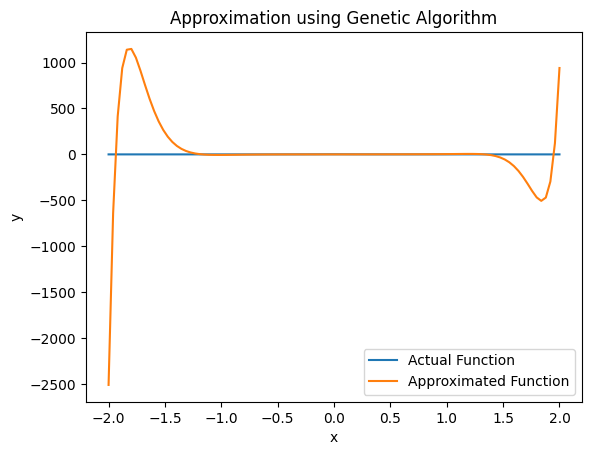

AttributeError: 'tuple' object has no attribute 'chapters'

In [11]:
def main():
    population_size = 50
    num_generations = 50

    population = toolbox.population(n=population_size)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)

    logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=num_generations,
                                  stats=stats, verbose=True)

    best_individual = tools.selBest(population, k=1)[0]
    print("Best individual (coefficients):", best_individual)
    
    x = np.linspace(-2, 2, 100)
    y_actual = runge_function(x)
    y_approx = np.polyval(best_individual, x)

    plt.figure()
    plt.plot(x, y_actual, label="Actual Function")
    plt.plot(x, y_approx, label="Approximated Function")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Approximation using Genetic Algorithm")
    plt.show()

    gen, min_vals = logbook.chapters["min"].select("gen", "min")
    plt.figure()
    plt.plot(gen, min_vals, label="Minimum MSE")
    plt.xlabel("Generation")
    plt.ylabel("MSE")
    plt.title("Evolution of MSE over Generations")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()